Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "WO YEW BEN"
COLLABORATORS = ""

---

# B&eacute;zier and rational B&eacute;zier curves
## Task 1: create a B&eacute;zier curve
In this task you will write a function <code>bezier(a)</code> that creates a B&eacute;zier curve (equation 13 in the notes) with control points defined by an $n\times2$ array <code>a</code>, returns a $101\times 2$ array <code>B</code> of $x,y$ points on the curve for $t[0,1]$ and plots the curve, control points and control polygon.

First you'll need to import Numpy for the maths and Matplotlib for the plotting:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

To implement equation 13 from the notes, you first need a function that calculates $\left(\begin{array}{c}n\\i\end{array}\right)$. We'll call this <code>choose(n, i)</code>, and it is provided for you in the module <code>aclabtools</code>:

In [3]:
from aclabtools import choose

Most of the <code>bezier</code> function has been written for you. In the code below, beneath the '<code># YOUR CODE HERE</code>', delete the '<code>raise NotImplementedError()</code>' and write a line of code starting <code>terms[j,:] = </code> to calculate the terms to be summed in equation 13 (you'll need to use the choose function). 

In [4]:
def bezier(a):
    # find order of curve from number of control points
    n = np.shape(a)[0]-1
    # initialise arrays
    B = np.zeros([101, 2])
    terms = np.zeros([n+1, 2])
    # create an array of values for t from 0 to 1 in 101 steps
    t = np.linspace(0, 1, 101)
    # loop through all t values
    for i in range(0, 101):
        #calculate terms inside sum in equation 13
        for j in range(0, n + 1):
            ((choose(n, j)) * (t[i]**i) * ((1-t[i])**(n-j))) * a[j, :]
        #sum terms to find Bezier curve
        B[i, :] = sum(terms, 0)
    # plot Bezier
    pl.plot(B[:, 0], B[:, 1])
    # plot control points
    pl.plot(a[:, 0], a[:, 1],'ko')
    # plot control polygon
    pl.plot(a[:, 0], a[:, 1],'k')
    return B

Check that your function works by passing it some control points:

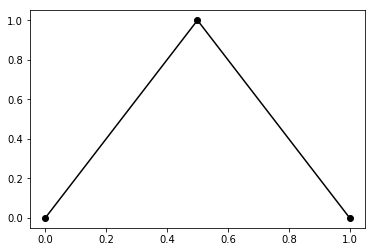

In [5]:
a = np.array([[0, 0], [0.5, 1], [1, 0]])
B = bezier(a)

It should return 101 points and start and end at the first and last control point:

In [6]:
print(len(B))
print(B[0, :])
print(B[-1, :])

101
[ 0.  0.]
[ 0.  0.]


Try passing your function more control points. 

The tests below will be used to grade your submission automatically.

In [7]:
"""Check that bezier returns the correct output for several inputs"""
assert bezier(np.array([[0.2, 1.5], [2, 0.6], [0, 0]]))[100,0] == 0.0
assert bezier(np.array([[0.2, 1.5], [2, 0.6], [5.0, 0]]))[100,0] == 5.0
assert bezier(np.array([[0,0], [0.5,1], [1, -1],[1.5, 1], [2, 0]]))[50,1] == 0.125

'Check that rational_bezier returns the correct output for several inputs'

AssertionError: 

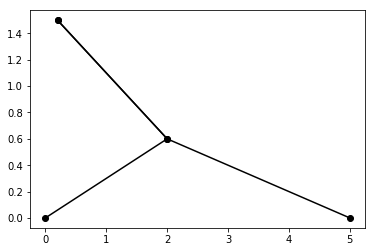

In [8]:
"""Check that bezier returns the correct output for several inputs"""
assert bezier(np.array([[0.2, 1.5], [2, 0.6], [0, 0]]))[100,0] == 0.0
assert bezier(np.array([[0.2, 1.5], [2, 0.6], [5.0, 0]]))[100,0] == 5.0
assert bezier(np.array([[0,0], [0.5,1], [1, -1],[1.5, 1], [2, 0]]))[50,1] == 0.125

## Task 2: create a rational B&eacute;zier curve
In this task you will write a function <code>rational_bezier(a, z)</code> that creates a rational B&eacute;zier curve with control points defined by an $n\times2$ array <code>a</code> with weights <code>z</code>, returns a $101\times 2$ array <code>B_rat</code> of $x,y$ points on the curve for $t[0,1]$ and plots the curve, control points and control polygon. Again, much of the code is written for you. In the code below, beneath the '<code># YOUR CODE HERE</code>', delete the '<code>raise NotImplementedError()</code>' and enter three lines of code to implement equation 17 from the notes.

In [ ]:
def rational_bezier(a, z):
    # find order of curve from number of control points
    n = np.shape(a)[0]-1
    # initialise arrays
    B_rat = np.zeros([101, 2])
    numerator_terms = np.zeros([n+1, 2])
    denominator_terms = np.zeros([n+1, 2])
    # create an array of values for t from 0 to 1 in 101 steps
    t = np.linspace(0, 1, 101)
    # loop through all t values
    for i in range(0, 101):
        for j in range(0, n + 1):
            h = (((choose(n, j)) * (t[i]**j) * ((1-t[i])**(n-j))) * \
                a[j] * z[j, :]) / (((choose(n, i)) * (t[x]**i) * ((1-t[x])**(n-i))) * \
                weights[i])
        B_rat[i, :] = h            
    # plot rational Bezier
    pl.plot(B_rat[:, 0], B_rat[:, 1])
    # plot control points
    pl.plot(a[:, 0], a[:, 1],'ko')
    # plot control polygon
    pl.plot(a[:, 0], a[:, 1],'k')
    return B_rat

Try out your code. For the same control points and with all weights set at 1, it should give the same results as <code>bezier</code>:

In [ ]:
a = np.array([[0,0], [0.5,1], [1, 0]])
z = np.array([1, 1, 1])
B=rational_bezier(a, z)
print(len(B))
print(B[0, :])
print(B[-1, :])

But, increasing the weight of a point 'draws' the curve towards it:

In [ ]:
a = np.array([[0,0], [0.5,1], [1, 0]])
z = np.array([1, 10, 1])
B=rational_bezier(a, z)

Restart the kernel and run all (click "Kernel", "Restart & Run All"), to make sure everything is working before submitting this .ipynb file via Blackboard. 